In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc3 as pm
from theano.compile.ops import  as_op
import theano.tensor as T

In [15]:
early = 10
late = 22
y = np.r_[np.random.poisson(early, 250), np.random.poisson(late, 125)]

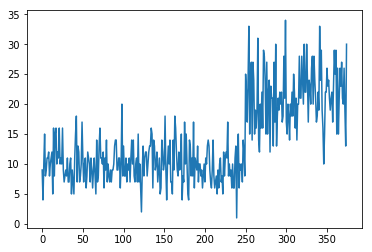

In [16]:
plt.plot(y)

In [11]:

niter = 10000
t = range(len(y))
with pm.Model() as change_point:
    cp = pm.DiscreteUniform('change_point', lower=0, upper=len(y), testval=len(y)//2)
    mu0 = pm.Exponential('mu0', 1/y.mean())
    mu1 = pm.Exponential('mu1', 1/y.mean())
    mu = T.switch(t < cp, mu0, mu1)
    Y_obs = pm.Poisson('Y_obs', mu=mu, observed=y)
    trace = pm.sample(niter)

/home/nilavro/irleak/lib/python3.5/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu1_log__, mu0_log__]
>Metropolis: [change_point]
 38%|███▊      | 3941/10500 [00:05<00:09, 724.24it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '19826' (I am process '19827')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/nilavro/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-16.04-xenial-x86_64-3.5.2-64/lock_dir
 38%|███▊      | 4020/10500 [00:05<00:08, 721.97it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '19826' (I am process '19828')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/nilavro/.theano/compiledir_Linux-4.13--g

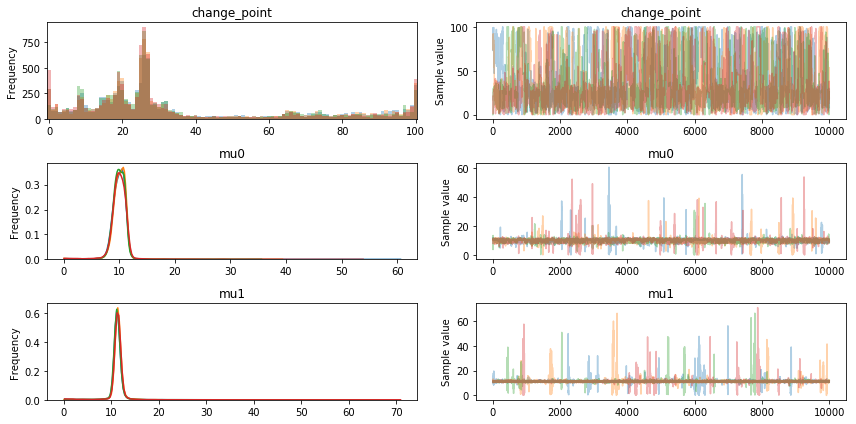

In [12]:
pm.traceplot(trace, varnames=['change_point', 'mu0', 'mu1'])
pass

In [ ]:

niter = 10000
t = range(len(y))
with pm.Model() as change_point:
    cp = pm.DiscreteUniform('change_point', lower=0, upper=len(y), testval=len(y)//2)
    mu0 = pm.Exponential('mu0', 1/y.mean())
    mu1 = pm.Exponential('mu1', 1/y.mean())
    mu = T.switch(t < cp, mu0, mu1)
    Y_obs = pm.Poisson('Y_obs', mu=mu, observed=y)
 
    mean_field = pm.fit(method='advi')